# Courtesy and Insights

https://blog.roboflow.com/instance-segmentation-roboflow/

https://blog.roboflow.com/how-to-train-yolov8-instance-segmentation/




Instance Segmentation

Individual Objects: Instance segmentation identifies each individual object in an image and delineates its boundaries. This means that each object of the same category is distinctly segmented with a unique identifier.

Usage in YOLO: In more advanced versions of YOLO (like YOLOv3 onwards and in the YOLOv8 family), capabilities have been extended beyond bounding box predictions to include segmentation masks, which can be used for instance segmentation. This involves not only locating objects within an image but also segmenting each instance of the objects.

Semantic Segmentation

Category Labeling: Semantic segmentation involves dividing an image into regions based on category but does not differentiate between different instances of the same category. Every pixel is labeled with a class, but individual objects are not uniquely identified.

General Approach: This type of segmentation would label all pixels of a particular class with the same color without distinguishing between different objects of the same class in the image.

Given that the masks are applied per detected object in your code and include unique bounding boxes for each detected instance, it suggests the model is performing instance segmentation. This method is more detailed than semantic segmentation as it provides not only the class label but also distinguishes between different objects of the same class.

# Step 1. Generate video of different fruits



# Step 2. Convert video frames to jpeg images

In [ ]:
import cv2
import os
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Path to the video file
video_path = '/content/drive/My Drive/Colab Notebooks/{input}.mp4'

# Directory to save the frames locally in Colab
save_dir = 'xxx'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Capture the video from the file
cap = cv2.VideoCapture(video_path)

current_frame = 0
while True:
    # Read the next frame from the video
    ret, frame = cap.read()

    if not ret:
        print("Finished reading the video.")
        break

    # Save the frame as a JPEG file
    save_path = os.path.join(save_dir, f"frame_{current_frame:04d}.jpg")
    cv2.imwrite(save_path, frame)
    print(f"Saved: {save_path}")

    current_frame += 1

cap.release()

print("All frames are extracted and saved locally.")


# Step 3. Upload images to Roboflow.

Do manual annotation

Add Labels

Add Bounding boxes.

Draw polygon using Smart Polygon tool and Free form polygon tool

Split Images to train, test, valid datasets

https://app.roboflow.com/test-4h9f7/fruit_segmentation-rclvi/1


# Step 4. Install packages

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196 -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import getpass
import os
YOUR_API_KEY = getpass.getpass()

··········


In [ ]:

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import requests

#YOUR_API_KEY = "YOUR_ACTUAL_API_KEY"  # Replace with your actual API key

url = "https://api.roboflow.com/"
headers = {"Authorization": f"Bearer {YOUR_API_KEY}"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    workspaces = response.json()
    print(workspaces)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

{'welcome': 'Welcome to the Roboflow API.', 'instructions': 'You are successfully authenticated.', 'docs': 'https://docs.roboflow.com', 'workspace': 'test-4h9f7'}


# Step 5. Download Dataset from roboflow

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key=YOUR_API_KEY)



project = rf.workspace("test-4h9f7").project("fruit_segmentation-rclvi")
version = project.version(1)
dataset = version.download("yolov8")






loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fruit_segmentation-1 in yolov8:: 100%|██████████| 178/178 [00:00<00:00, 4292.20it/s]


In [ ]:
!ls -ltr /content/datasets/

total 4
drwxr-xr-x 5 root root 4096 Aug 12 16:52 fruit_segmentation-1


# Step 6. Train ultralytics YOLO model

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8m-seg.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=50, imgsz=640)

100%|██████████| 52.4M/52.4M [00:00<00:00, 153MB/s]
New https://pypi.org/project/ultralytics/8.2.76 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/fruit_segmentation-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stri

In [ ]:
#!ls -ltr /content/datasets/

# Step 7. Run Prediction on test images

In [ ]:
from ultralytics import YOLO
import os

# Set up paths
home_dir = "/content/datasets"
model_path = os.path.join(home_dir, "runs/segment/train/weights/best.pt")
image_dir = os.path.join("/content/datasets/fruit_segmentation-1", "test/images")

# Load the model
model = YOLO(model_path)

# Run prediction
results = model.predict(source=image_dir, conf=0.25, save=True)

# If you need to access the output, you can iterate through results
for result in results:
    print(result)  # or save, or visualize



image 1/8 /content/datasets/fruit_segmentation-1/test/images/frame_0010_jpg.rf.fa801b0db40d9037937d2ee581c3ed4a.jpg: 640x640 1 banana, 1 lemon, 1 orange, 50.2ms
image 2/8 /content/datasets/fruit_segmentation-1/test/images/frame_0025_jpg.rf.4b531074b818a6c01f93a38ded78f3fe.jpg: 640x640 1 banana, 1 lemon, 1 orange, 39.2ms
image 3/8 /content/datasets/fruit_segmentation-1/test/images/frame_0030_jpg.rf.414f8945d60e0cc2a126a4908370b49c.jpg: 640x640 1 apple, 1 banana, 3 plums, 39.2ms
image 4/8 /content/datasets/fruit_segmentation-1/test/images/frame_0033_jpg.rf.5f6d82b749d2944ef2db6a0dcea9e8a3.jpg: 640x640 1 apple, 1 banana, 2 plums, 39.2ms
image 5/8 /content/datasets/fruit_segmentation-1/test/images/frame_0039_jpg.rf.b9bd935380b46bb4921be6fd90d66a1d.jpg: 640x640 1 apple, 1 banana, 1 plum, 34.3ms
image 6/8 /content/datasets/fruit_segmentation-1/test/images/frame_0043_jpg.rf.f3422053e8fec787df23b4a99d92008c.jpg: 640x640 1 apple, 1 banana, 1 plum, 24.6ms
image 7/8 /content/datasets/fruit_segme

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'apple', 1: 'banana', 2: 'lemon', 3: 'orange', 4: 'plum'}
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
    

In [ ]:
#!ls -ltr /content/datasets/

runs/segment/predict/frame_0043_jpg.rf.f3422053e8fec787df23b4a99d92008c.jpg


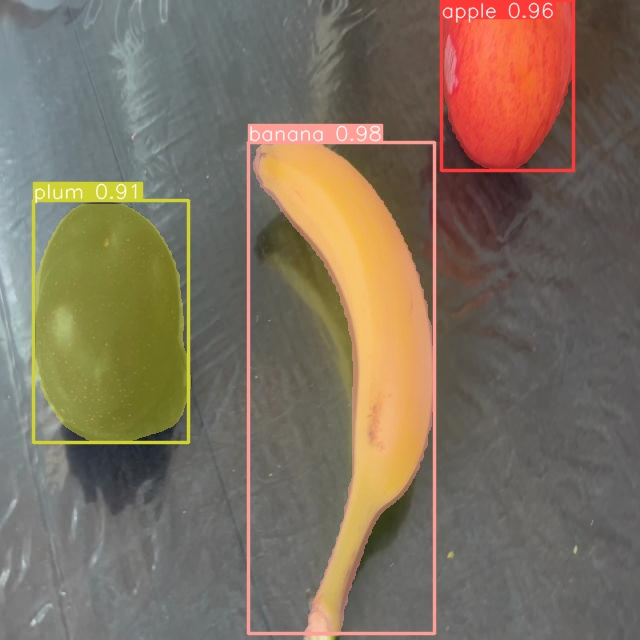

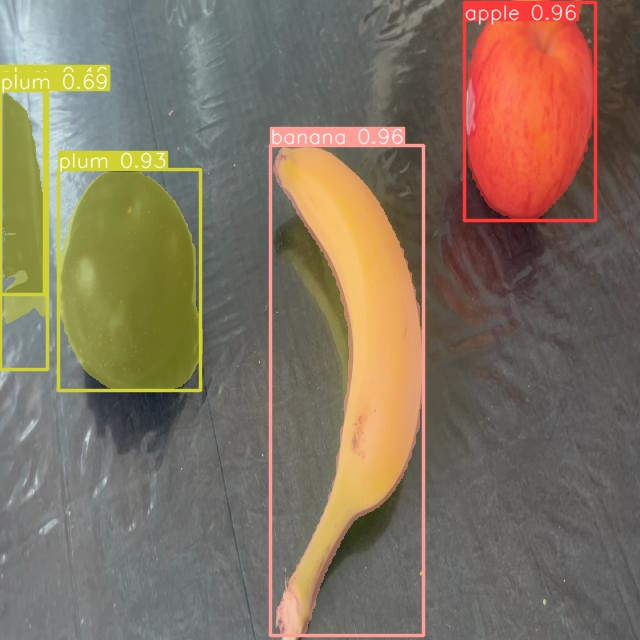

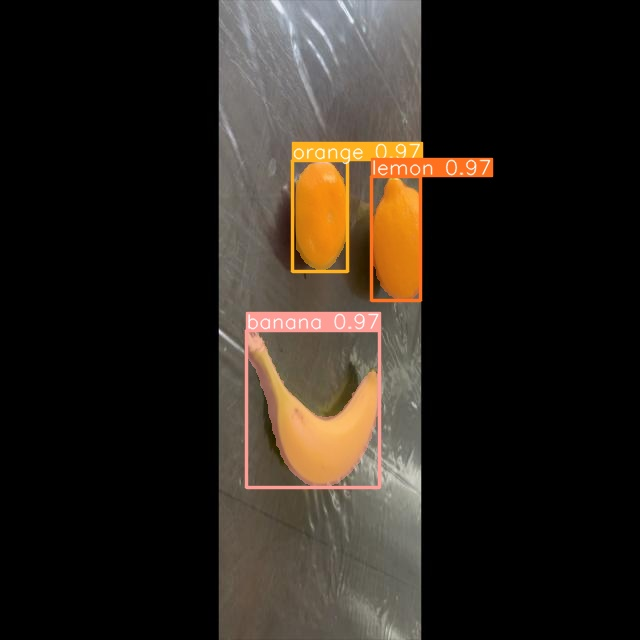

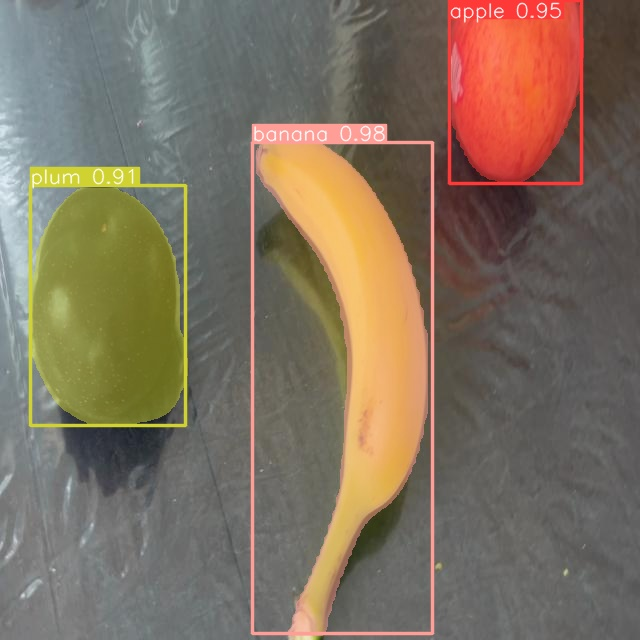

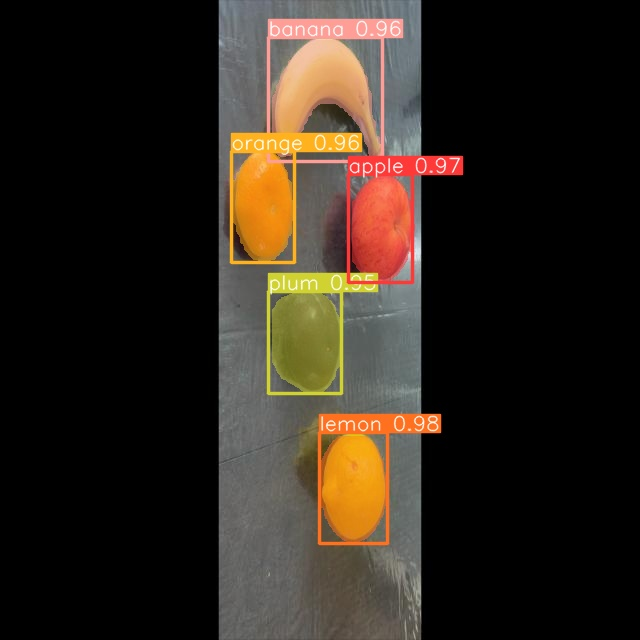

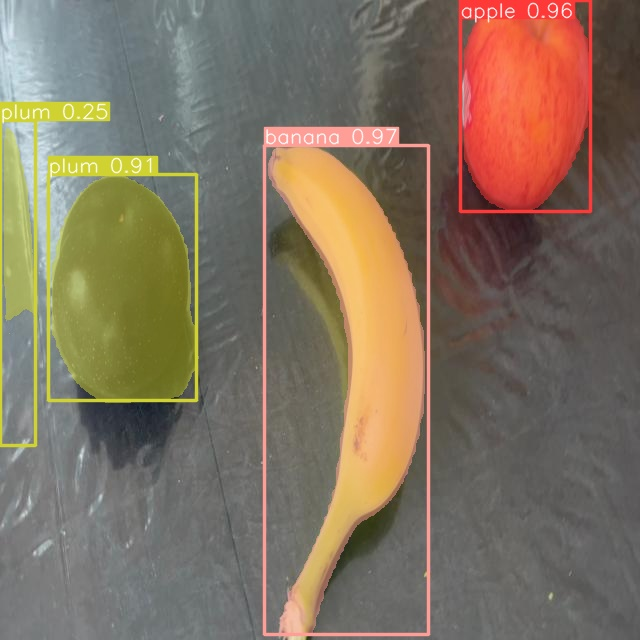



runs/segment/predict/frame_0030_jpg.rf.414f8945d60e0cc2a126a4908370b49c.jpg


runs/segment/predict/frame_0010_jpg.rf.fa801b0db40d9037937d2ee581c3ed4a.jpg


runs/segment/predict/frame_0039_jpg.rf.b9bd935380b46bb4921be6fd90d66a1d.jpg


runs/segment/predict/frame_0072_jpg.rf.6ee908b2305056e030270f44d4804923.jpg


runs/segment/predict/frame_0033_jpg.rf.5f6d82b749d2944ef2db6a0dcea9e8a3.jpg


runs/segment/predict/frame_0071_jpg.rf.9feb8a2d16214599dbf75562b5433dc3.jpg


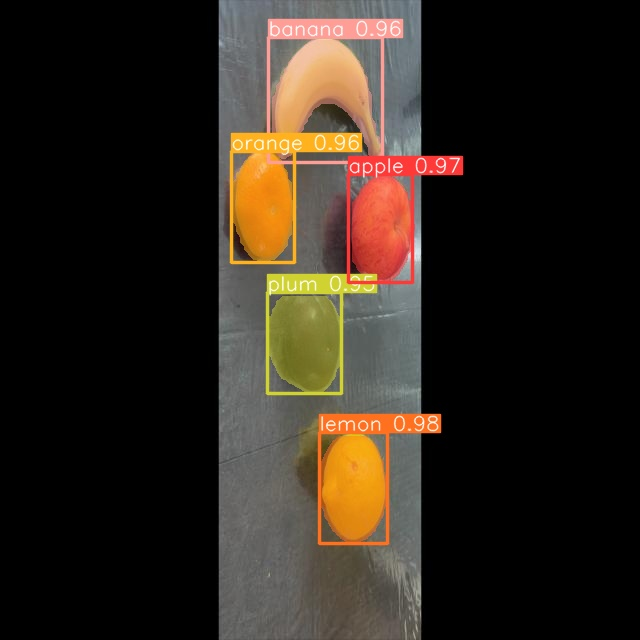



runs/segment/predict/frame_0025_jpg.rf.4b531074b818a6c01f93a38ded78f3fe.jpg


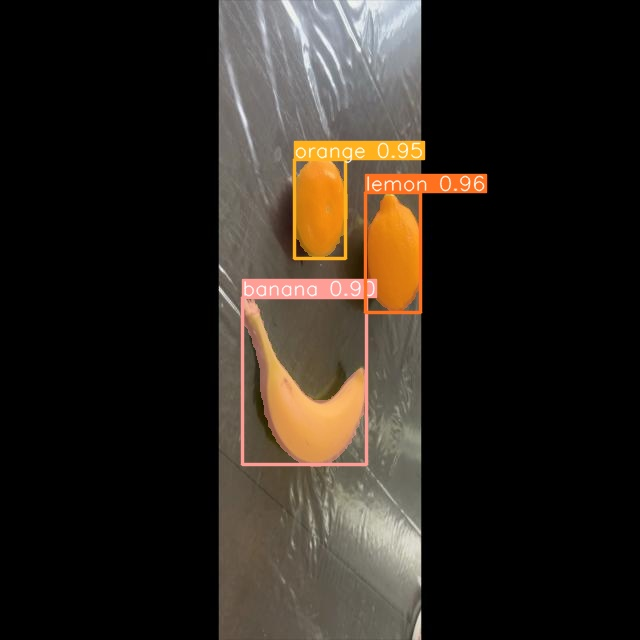

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg'):
      print(image_path)
      display(Image(filename=image_path, height=600))
      print("\n")

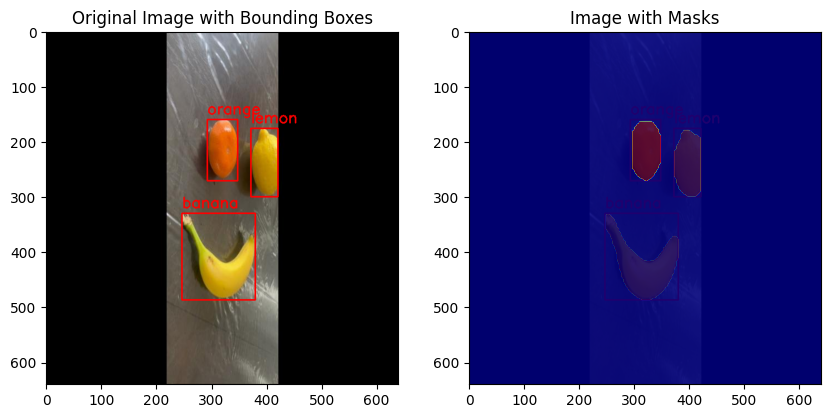

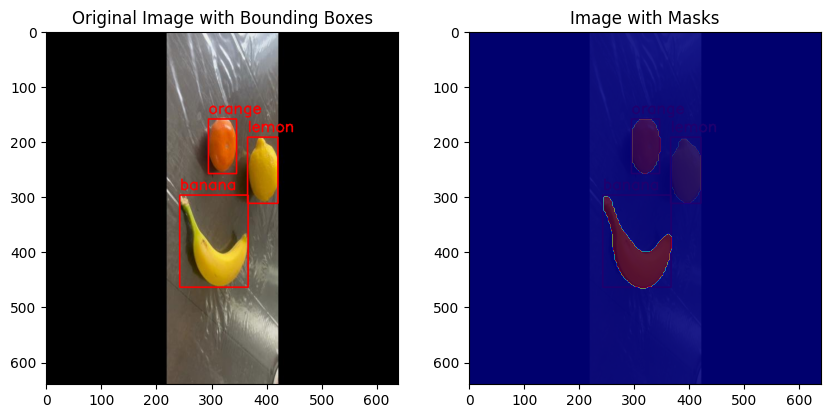

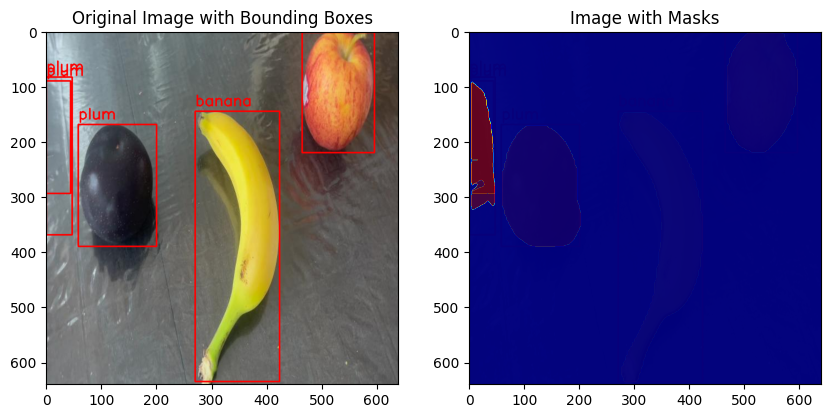

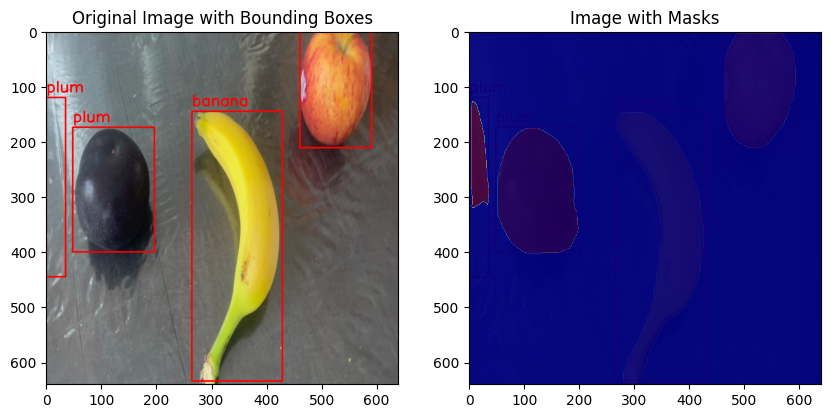

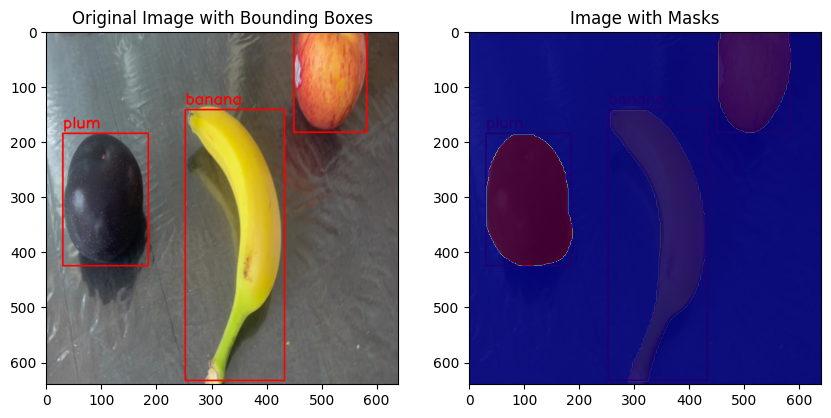

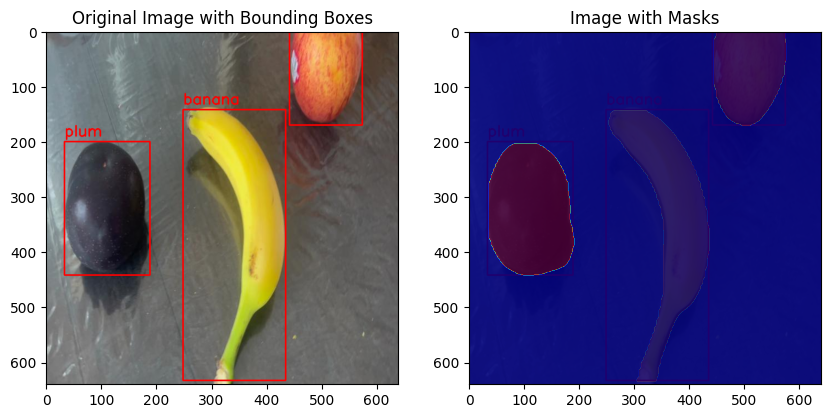

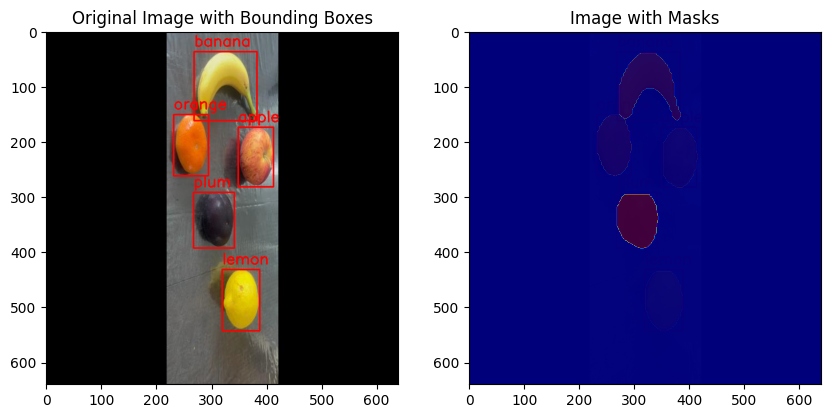

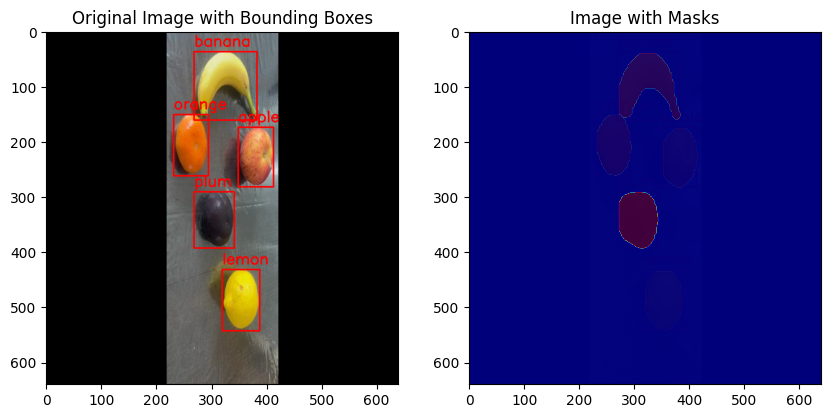

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Assuming `results` is a list of `Results` objects from the YOLO model prediction

for result in results:
    # Load the original image
    img = cv2.imread(result.path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image with Bounding Boxes")

    # Draw bounding boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(img_rgb, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img_rgb)

    # Display the mask on the original image
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb)
    for mask in result.masks.data:
        mask = mask.cpu().numpy()
        plt.imshow(mask, alpha=0.5, cmap='jet')  # Overlay the mask on the image

    plt.title("Image with Masks")
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Set up paths
model_path = "/content/datasets/runs/segment/train/weights/best.pt"
image_path = "/content/drive/My Drive/Colab Notebooks/new_test_img1.jpg"
output_image_path = "/content/new_test_img_with_results.jpg"

# Load the model
model = YOLO(model_path)

# Run prediction
results = model.predict(source=image_path, conf=0.25, save=True)





image 1/1 /content/drive/My Drive/Colab Notebooks/new_test_img1.jpg: 480x640 1 apple, 5 bananas, 2 plums, 118.9ms
Speed: 3.1ms preprocess, 118.9ms inference, 7.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict2


runs/segment/predict2/new_test_img1.jpg


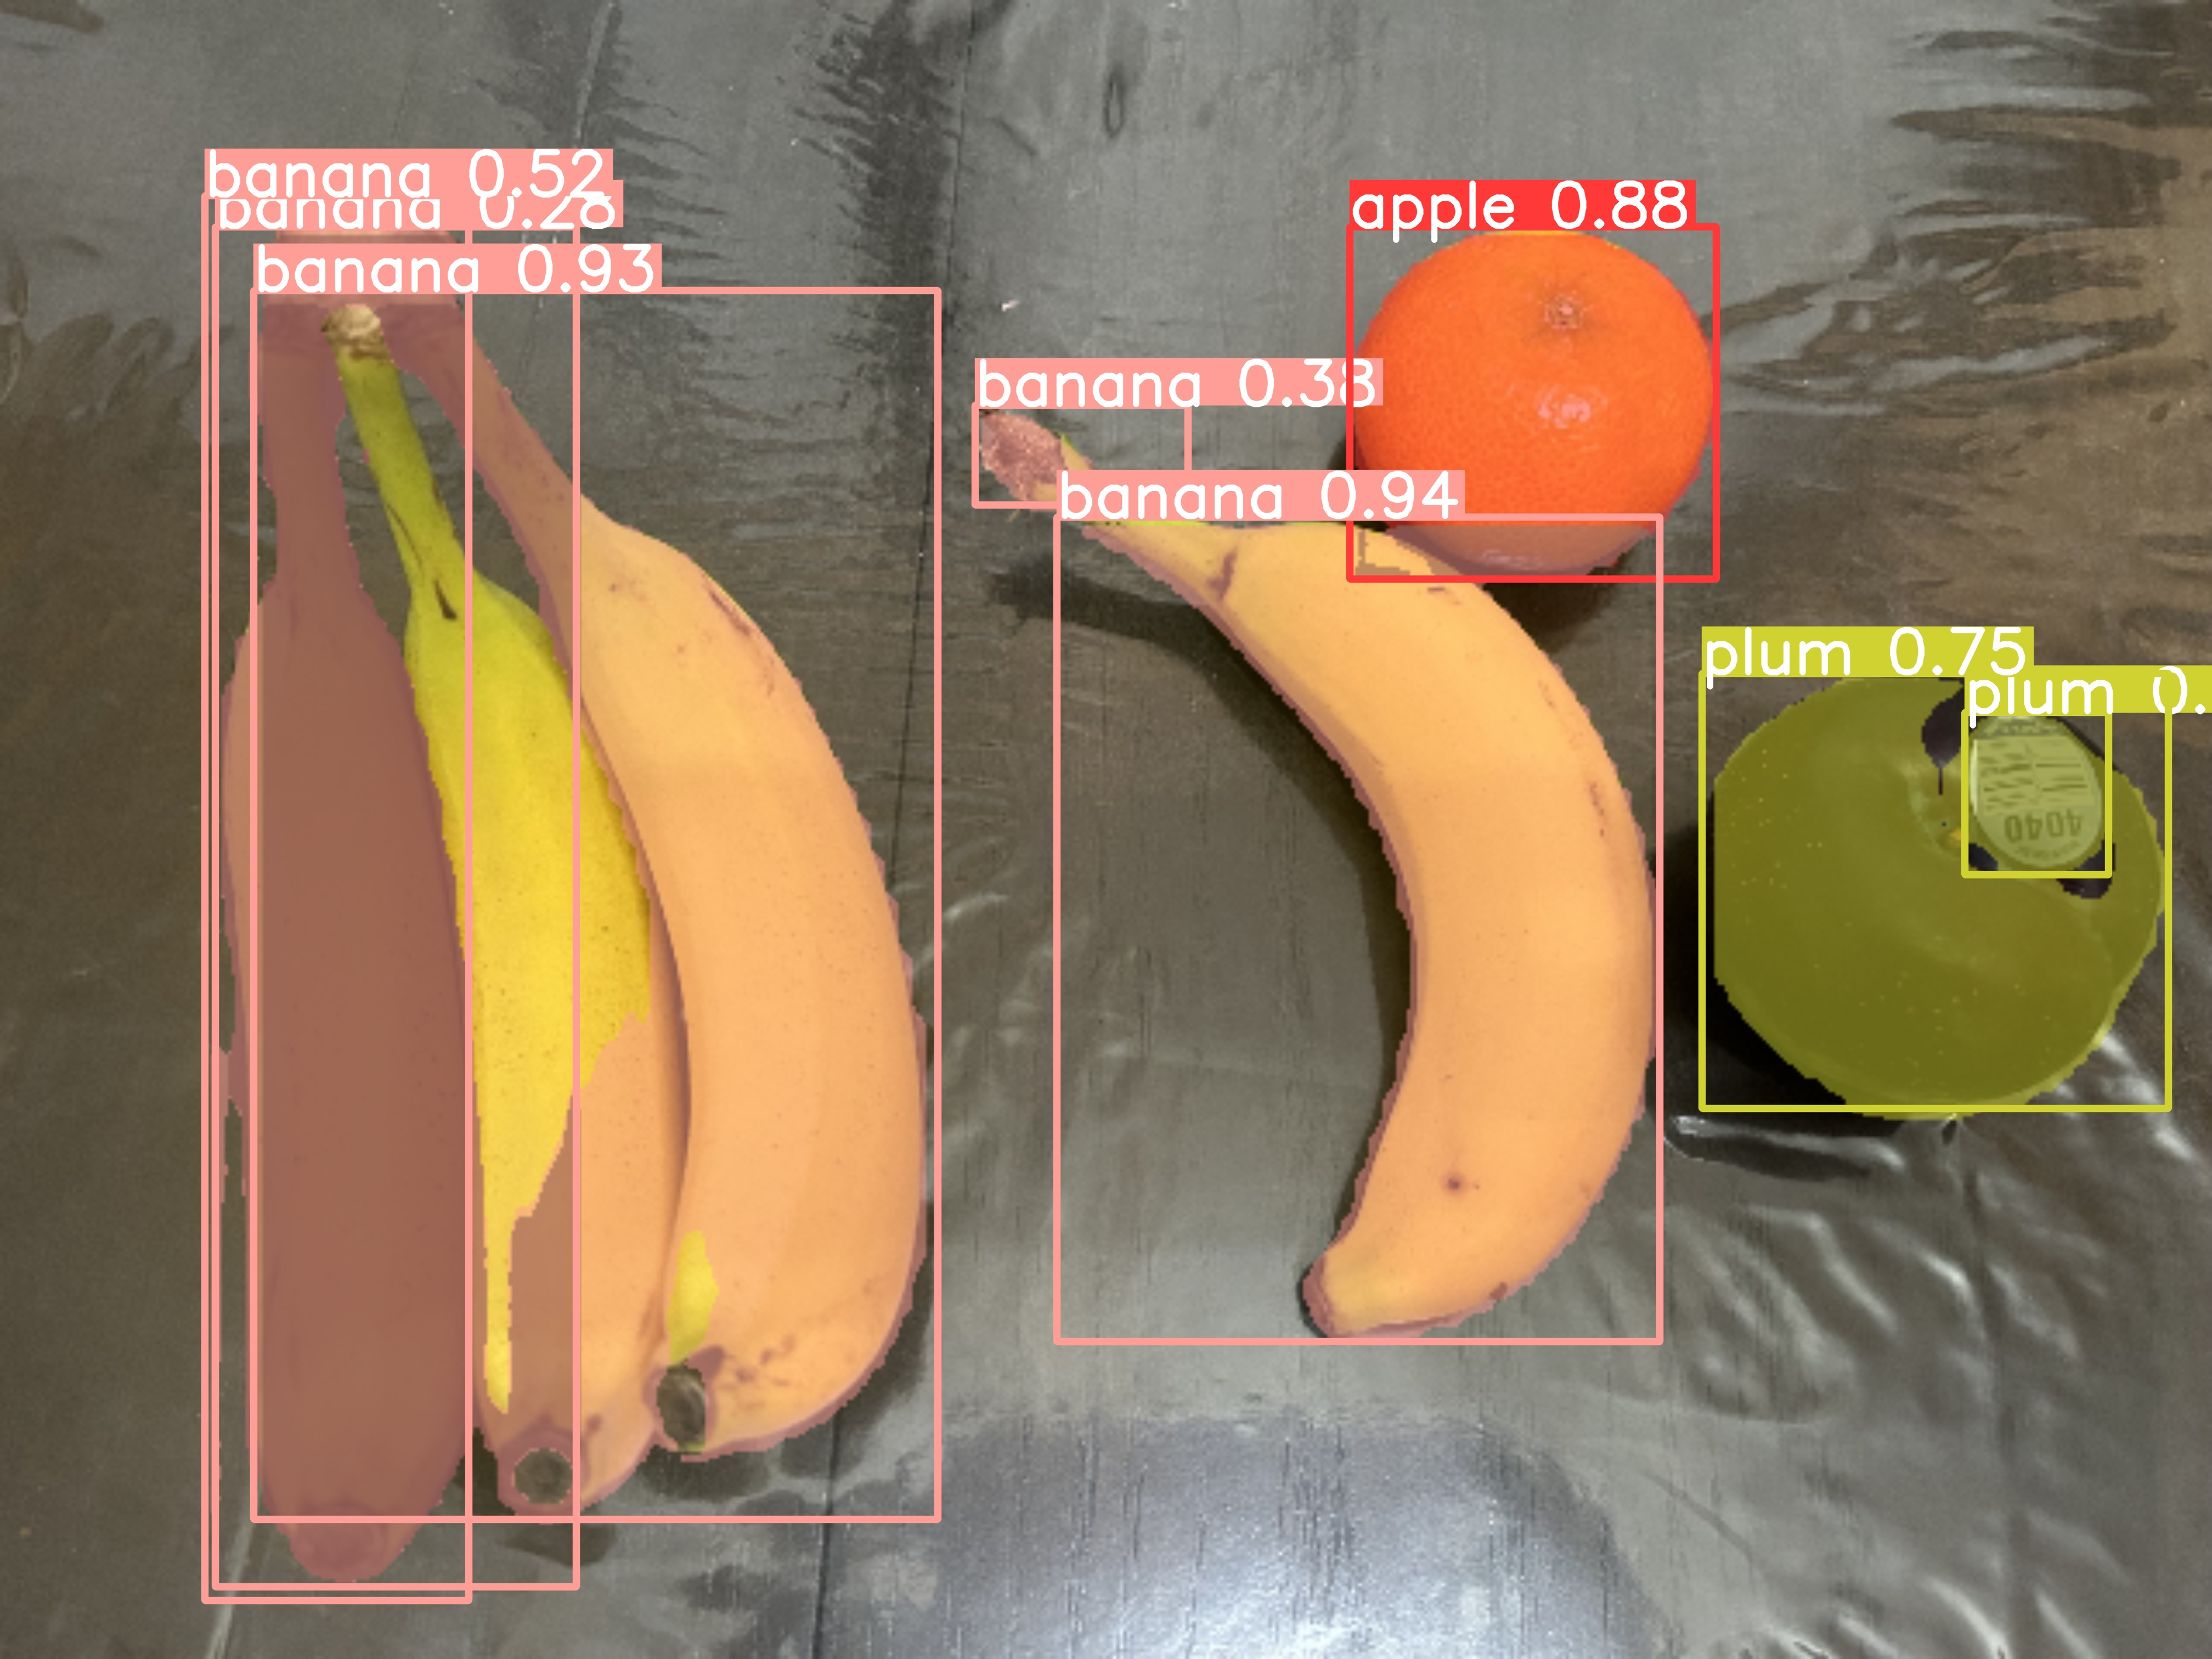

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict2/*.jpg'):
      print(image_path)
      display(Image(filename=image_path, height=600))
      print("\n")

# Step 8. Display masks

In [ ]:
import matplotlib.pyplot as plt
import cv2

for result in results:
    # Load the original image
    img = cv2.imread(result.path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Lighten the background image
    img_rgb = cv2.convertScaleAbs(img_rgb, alpha=1.5, beta=50)  # Increase brightness

    # Display the original image with bounding boxes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image with Bounding Boxes")

    # Draw bounding boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        confidence = box.conf[0]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(img_rgb, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img_rgb)

    # Display the mask on the lightened image
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb)
    for mask in result.masks.data:
        mask = mask.cpu().numpy()
        plt.imshow(mask, alpha=0.5, cmap='jet')  # Overlay the mask on the image

    plt.title("Image with Masks")
    plt.axis("off")
    plt.show()


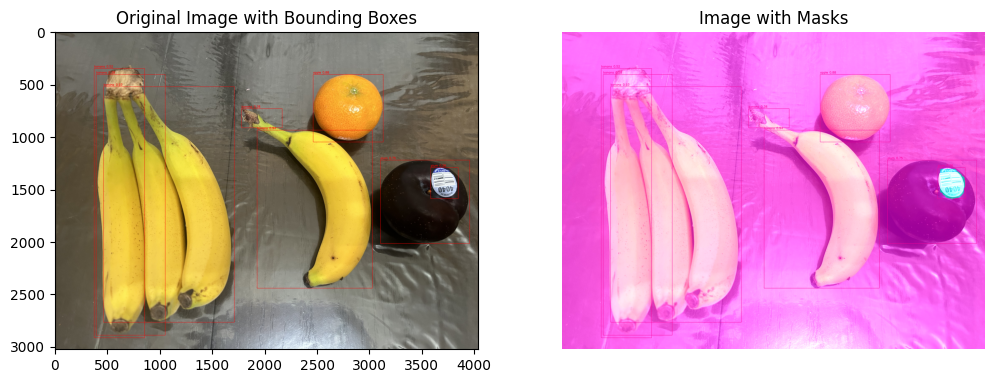

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

for result in results:
    # Load the original image
    img = cv2.imread(result.path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the original image with bounding boxes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image with Bounding Boxes")

    # # Draw bounding boxes
    # for box in result.boxes:
    #     x1, y1, x2, y2 = map(int, box.xyxy[0])
    #     label = result.names[int(box.cls)]
    #     confidence = box.conf[0]
    #     cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
    #     cv2.putText(img_rgb, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Draw bounding boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        confidence = box.conf[0]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(img_rgb, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img_rgb)

    # Prepare to display masks
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb)  # Display the original image for mask overlay
    plt.title("Image with Masks")

    # Overlay masks
    for mask in result.masks.data:
        mask = mask.cpu().numpy()
        # Resize mask to match the image dimensions
        mask_resized = cv2.resize(mask, (img_rgb.shape[1], img_rgb.shape[0]), interpolation=cv2.INTER_NEAREST)
        # Apply color map
        mask_colored = cv2.applyColorMap((mask_resized * 255).astype(np.uint8), cv2.COLORMAP_SPRING)
        # Blend the mask with the image
        img_with_mask = cv2.addWeighted(img_rgb, 1, mask_colored, 0.6, 0)  # Adjust alpha for visibility

    plt.imshow(img_with_mask)
    plt.axis("off")
    plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Set up paths
model_path = "/content/datasets/runs/segment/train/weights/best.pt"
image_path = "/content/drive/My Drive/Colab Notebooks/new_test_img2.jpg"
output_image_path = "/content/new_test_img_with_results.jpg"

# Load the model
model = YOLO(model_path)

# Run prediction
results = model.predict(source=image_path, conf=0.25, save=True)



image 1/1 /content/drive/My Drive/Colab Notebooks/new_test_img2.jpg: 480x640 4 bananas, 39.3ms
Speed: 3.1ms preprocess, 39.3ms inference, 5.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict3


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict3/*.jpg'):
      print(image_path)
      display(Image(filename=image_path, height=600))
      print("\n")

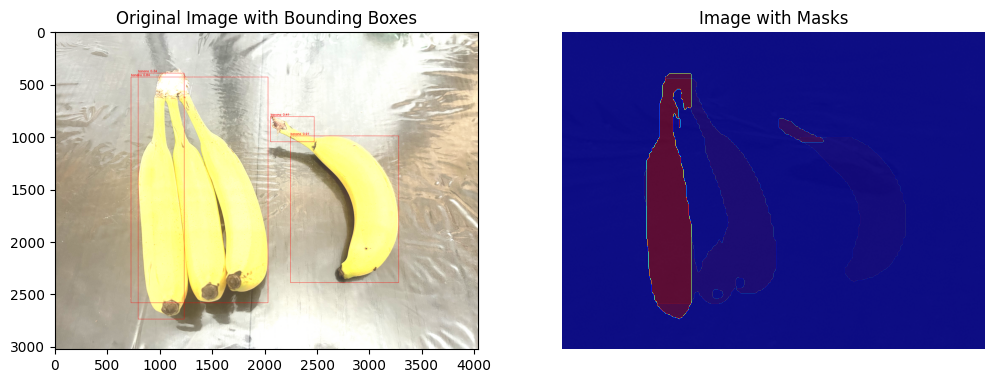

In [ ]:
import matplotlib.pyplot as plt
import cv2

for result in results:
    # Load the original image
    img = cv2.imread(result.path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Lighten the background image
    img_rgb = cv2.convertScaleAbs(img_rgb, alpha=1.5, beta=50)  # Increase brightness

    # Display the original image with bounding boxes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image with Bounding Boxes")

    # Draw bounding boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        confidence = box.conf[0]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(img_rgb, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img_rgb)

    # Display the mask on the lightened image
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb)
    for mask in result.masks.data:
        mask = mask.cpu().numpy()
        plt.imshow(mask, alpha=0.5, cmap='jet')  # Overlay the mask on the image

    plt.title("Image with Masks")
    plt.axis("off")
    plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Set up paths
model_path = "/content/datasets/runs/segment/train/weights/best.pt"
image_path = "/content/drive/My Drive/Colab Notebooks/new_test_img3.jpg"
output_image_path = "/content/new_test_img_with_results.jpg"

# Load the model
model = YOLO(model_path)

# Run prediction
results = model.predict(source=image_path, conf=0.25, save=True)




image 1/1 /content/drive/My Drive/Colab Notebooks/new_test_img3.jpg: 480x640 1 apple, 3 bananas, 1 plum, 39.2ms
Speed: 4.2ms preprocess, 39.2ms inference, 5.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict4


runs/segment/predict4/new_test_img3.jpg


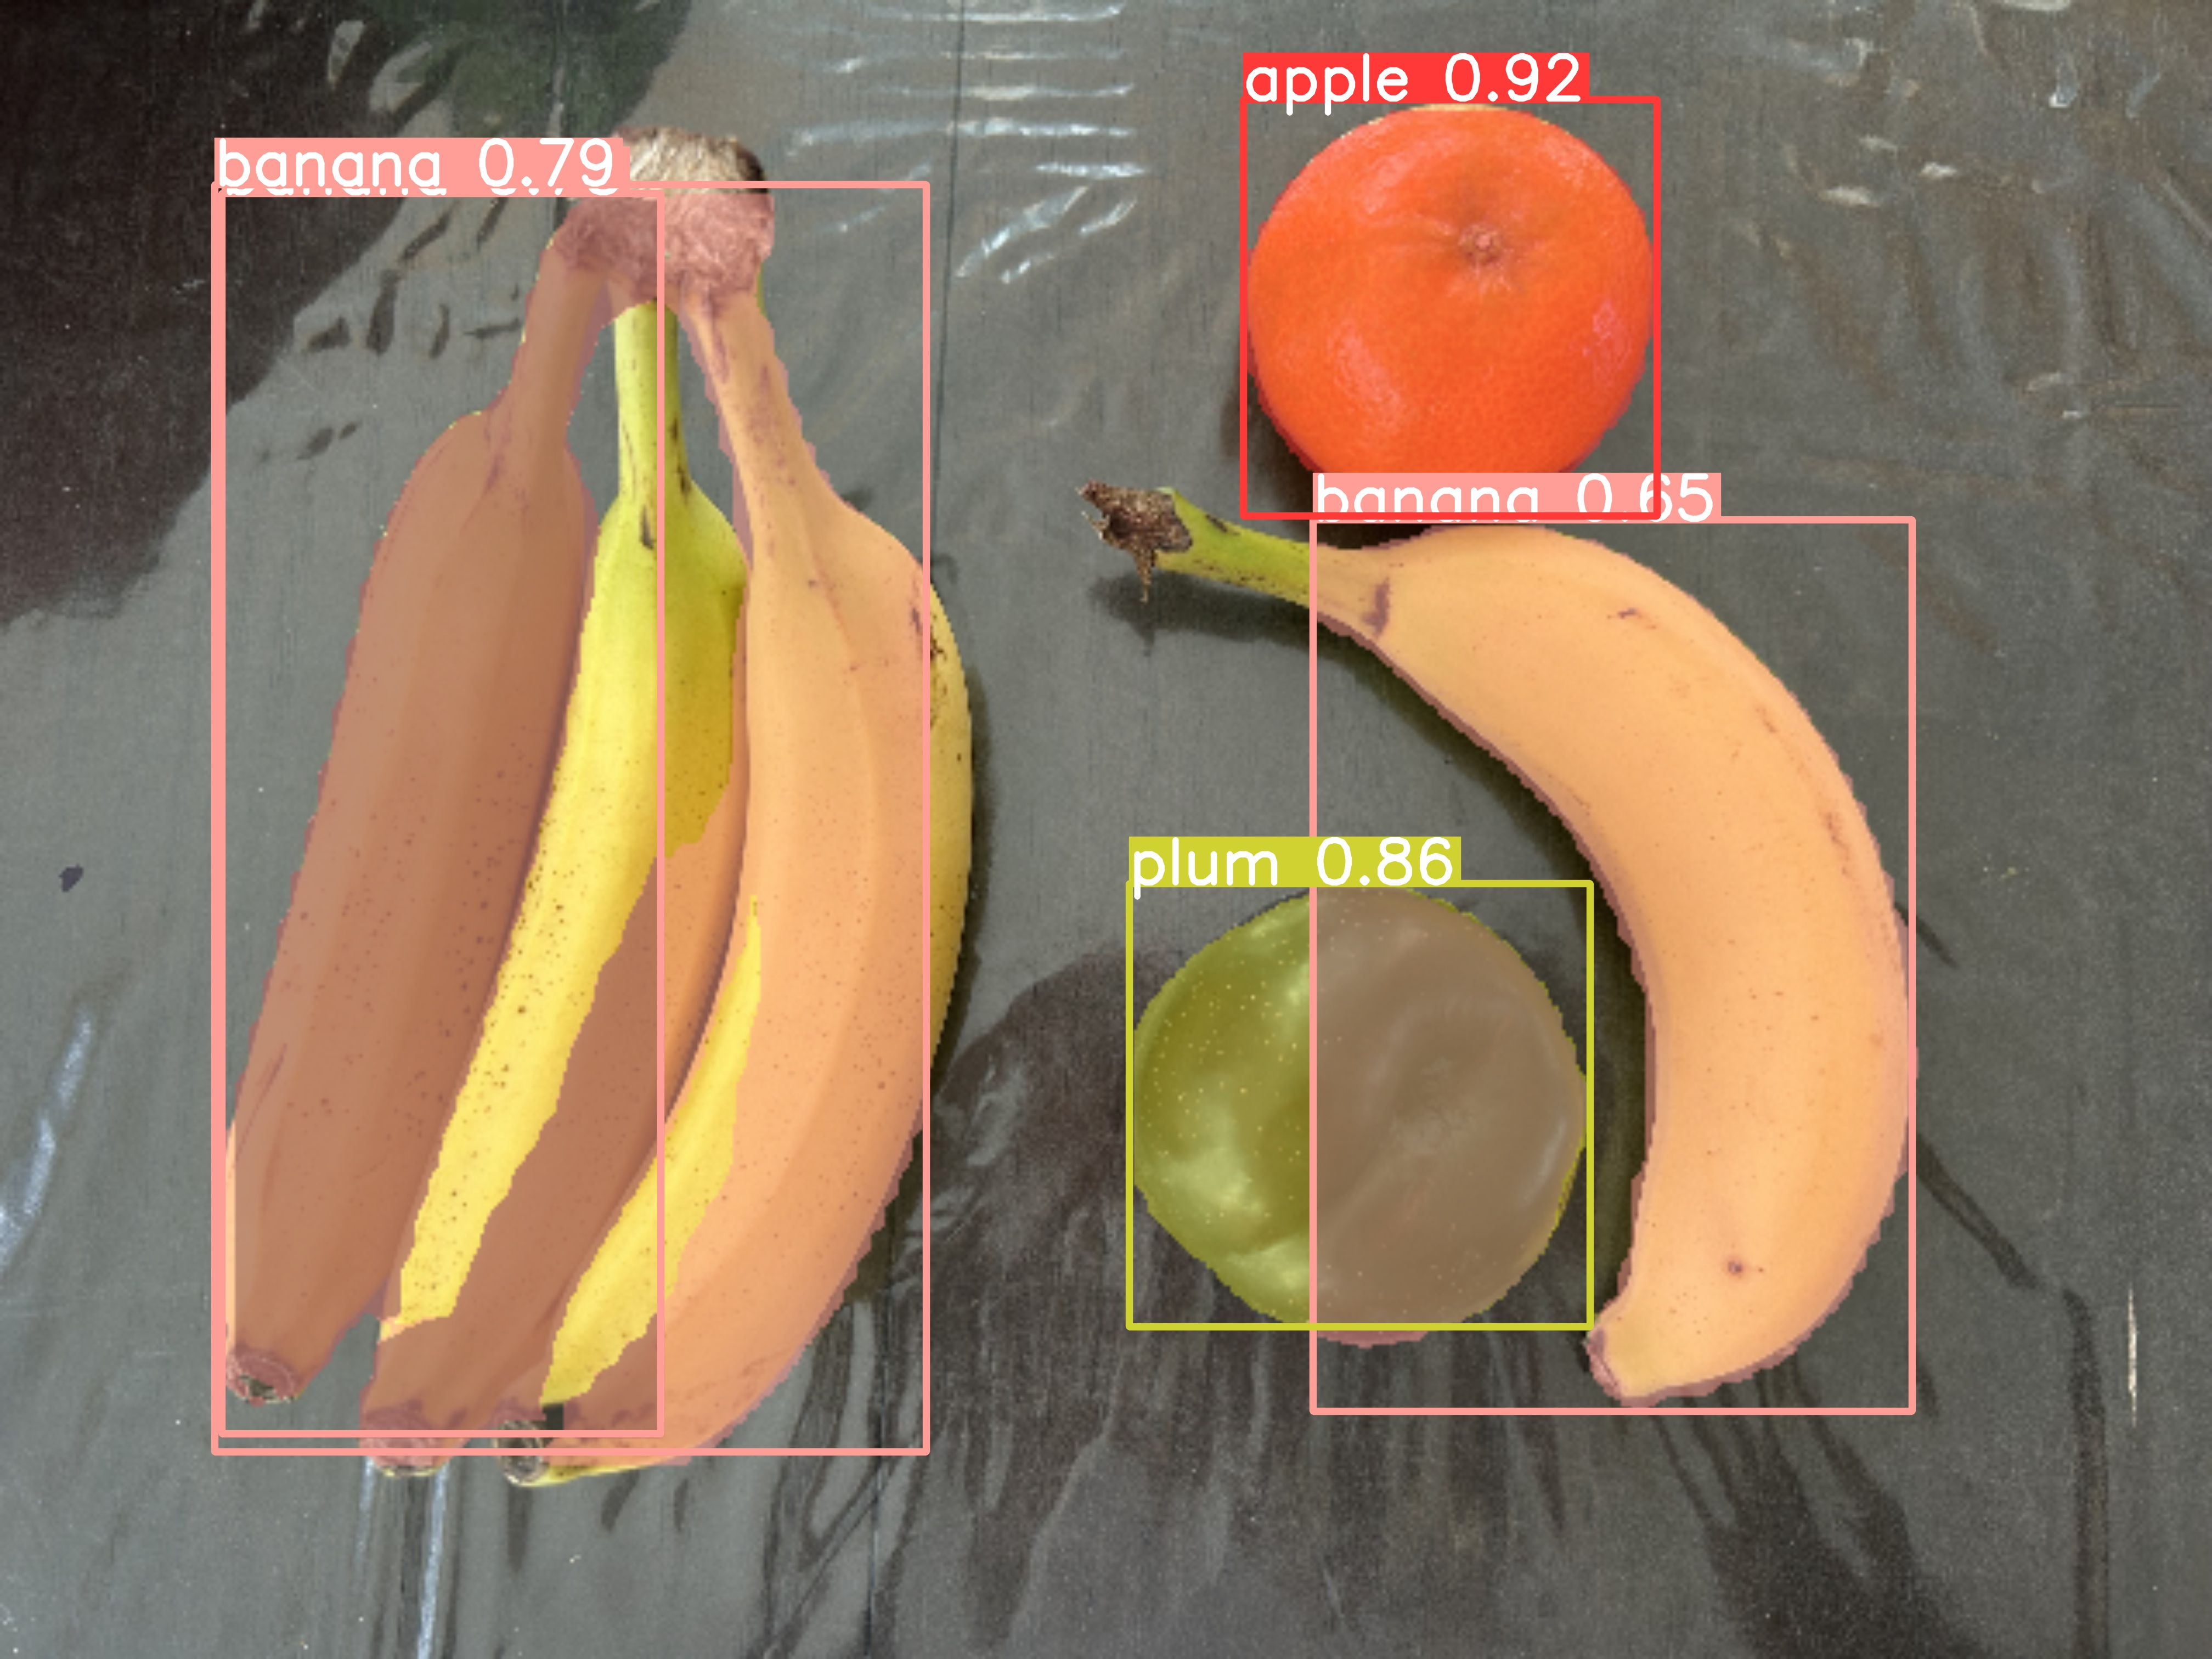

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict4/*.jpg'):
      print(image_path)
      display(Image(filename=image_path, height=600))
      print("\n")

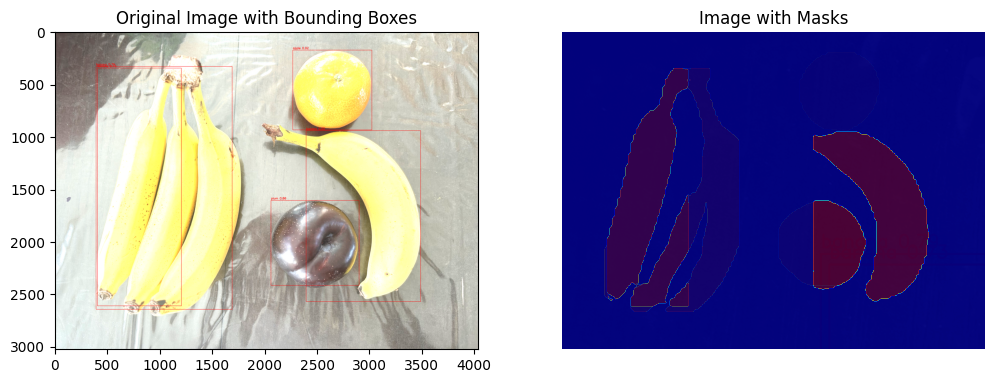

In [ ]:
import matplotlib.pyplot as plt
import cv2

for result in results:
    # Load the original image
    img = cv2.imread(result.path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Lighten the background image
    img_rgb = cv2.convertScaleAbs(img_rgb, alpha=1.5, beta=50)  # Increase brightness

    # Display the original image with bounding boxes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image with Bounding Boxes")

    # Draw bounding boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        confidence = box.conf[0]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(img_rgb, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img_rgb)

    # Display the mask on the lightened image
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb)
    for mask in result.masks.data:
        mask = mask.cpu().numpy()
        plt.imshow(mask, alpha=0.5, cmap='jet')  # Overlay the mask on the image

    plt.title("Image with Masks")
    plt.axis("off")
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

for result in results:
    # Load the original image
    img = cv2.imread(result.path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the original image with bounding boxes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image with Bounding Boxes")

    # # Draw bounding boxes
    # for box in result.boxes:
    #     x1, y1, x2, y2 = map(int, box.xyxy[0])
    #     label = result.names[int(box.cls)]
    #     confidence = box.conf[0]
    #     cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
    #     cv2.putText(img_rgb, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Draw bounding boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        confidence = box.conf[0]
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)
        cv2.putText(img_rgb, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(img_rgb)

    # Prepare to display masks
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb)  # Display the original image for mask overlay
    plt.title("Image with Masks")

    # Overlay masks
    for mask in result.masks.data:
        mask = mask.cpu().numpy()
        # Resize mask to match the image dimensions
        mask_resized = cv2.resize(mask, (img_rgb.shape[1], img_rgb.shape[0]), interpolation=cv2.INTER_NEAREST)
        # Apply color map
        mask_colored = cv2.applyColorMap((mask_resized * 255).astype(np.uint8), cv2.COLORMAP_SPRING)
        # Blend the mask with the image
        img_with_mask = cv2.addWeighted(img_rgb, 1, mask_colored, 0.6, 0)  # Adjust alpha for visibility

    plt.imshow(img_with_mask)
    plt.axis("off")
    plt.show()


Instance Segmentation

Individual Objects: Instance segmentation identifies each individual object in an image and delineates its boundaries. This means that each object of the same category is distinctly segmented with a unique identifier.

Usage in YOLO: In more advanced versions of YOLO (like YOLOv3 onwards and in the YOLOv8 family), capabilities have been extended beyond bounding box predictions to include segmentation masks, which can be used for instance segmentation. This involves not only locating objects within an image but also segmenting each instance of the objects.

Semantic Segmentation

Category Labeling: Semantic segmentation involves dividing an image into regions based on category but does not differentiate between different instances of the same category. Every pixel is labeled with a class, but individual objects are not uniquely identified.

General Approach: This type of segmentation would label all pixels of a particular class with the same color without distinguishing between different objects of the same class in the image.

Given that the masks are applied per detected object in your code and include unique bounding boxes for each detected instance, it suggests the model is performing instance segmentation. This method is more detailed than semantic segmentation as it provides not only the class label but also distinguishes between different objects of the same class.